In [7]:
import pandas as pd 
import numpy as np

ImportError: Failed to load PyTorch C extensions:
    It appears that PyTorch has loaded the `torch/_C` folder
    of the PyTorch repository rather than the C extensions which
    are expected in the `torch._C` namespace. This can occur when
    using the `install` workflow. e.g.
        $ python setup.py install && python -c "import torch"

    This error can generally be solved using the `develop` workflow
        $ python setup.py develop && python -c "import torch"  # This should succeed
    or by running Python from a different directory.

In [6]:
import sys
sys.path.append('/Users/jaredhuzar/.pyenv/versions/3.7.3/lib/python3.7/site-packages')

In [13]:
"""
    READ: 
    
    The output in the baseline_predictions file is the raw output from the model. 
    In order to compute the probabilities of each class, we can run those through a sigmoid activation. 

    I'll transform the outputs to get you started and then you can evaluate the results based on the highest probability class vs. the ground truth in the 
    test set. 

    Note: these results are for the first ~440 entries of the test dataset. Didn't have time or compute to go through whole set. 
""";

In [8]:
results = pd.read_csv('baseline_predictions.csv')
results.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,293791220,0.925600,3.140086,-4.455204,0.497362,-1.499902,-3.183516,-5.101686,-3.795463,0.201782,...,-1.786434,-0.423740,2.620455,-2.572699,0.189520,-3.215269,-5.850177,-0.869106,-3.256915,-0.792061
1,176321177,1.605840,1.683654,-3.988882,-1.046843,1.070242,-2.431736,-3.899845,-2.878224,1.148012,...,0.285492,-2.441268,-1.147363,-1.798748,2.177752,-3.442576,-3.717932,1.942490,-3.434889,-2.452623
2,53db66bd9,-1.678693,1.180630,-4.616457,1.498587,-4.399951,-1.758602,-3.262021,-3.210447,-3.414670,...,-2.049337,-1.113432,4.620639,-2.620910,-2.750528,-0.931981,-4.828383,-3.569431,-1.365445,1.199093
3,0637cd357,-0.118464,-0.096711,-1.637704,0.290408,-0.024889,0.703534,1.301321,-0.098025,-0.232231,...,0.064394,-1.045705,0.041449,-0.055993,-0.043614,1.026765,-0.672036,-0.036225,1.377655,1.512805
4,8cc7be1ef,1.813500,1.822869,-3.190683,-1.680457,1.361062,-2.870711,-4.251253,-2.993645,1.971706,...,-0.546216,-2.186830,-1.978520,-1.808539,1.521620,-3.878240,-4.003633,0.916820,-3.767308,-2.818195


In [20]:
def sig(x):
    val = 1/(1 + np.exp(-x))
    return val

In [23]:
prob = pd.DataFrame(index = range(len(results)), columns = results.columns)
prob.iloc[:,0] = results['recording_id']
for x in range(1,len(results.columns)):
    prob.iloc[:,x] =results.iloc[:, x].apply(lambda x: sig(x))

In [24]:
prob.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,293791220,0.716182,0.958516,0.011485,0.621839,0.182440,0.039791,0.006050,0.021979,0.550275,...,0.143510,0.395622,0.932166,0.070916,0.547239,0.038595,0.002871,0.295440,0.037079,0.311726
1,176321177,0.832833,0.843388,0.018184,0.259832,0.744643,0.080784,0.019843,0.053241,0.759148,...,0.570892,0.080079,0.240971,0.142004,0.898234,0.030991,0.023708,0.874625,0.031223,0.079247
2,53db66bd9,0.157269,0.765061,0.009791,0.817364,0.012129,0.146966,0.036897,0.038774,0.031840,...,0.114119,0.247232,0.990250,0.067805,0.060057,0.282523,0.007936,0.027400,0.203357,0.768363
3,0637cd357,0.470419,0.475841,0.162778,0.572096,0.493778,0.668971,0.786057,0.475513,0.442202,...,0.516093,0.260051,0.510361,0.486005,0.489098,0.736288,0.338041,0.490945,0.798614,0.819476
4,8cc7be1ef,0.859784,0.860910,0.039518,0.157035,0.795932,0.053621,0.014046,0.047714,0.877794,...,0.366743,0.100939,0.121477,0.140815,0.820777,0.020268,0.017922,0.714394,0.022592,0.056349


In [25]:
import seaborn as sns

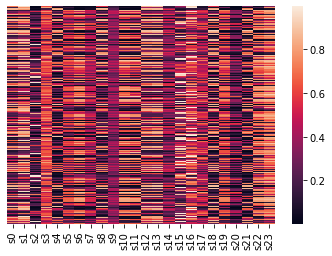

In [37]:
#ax = sns.heatmap(prob.drop(['recording_id'], axis = 1), yticklabels = prob['recording_id'])
ax = sns.heatmap(prob.drop(['recording_id'], axis = 1), yticklabels= False)

In [41]:
pred = pd.DataFrame(index = range(len(results)), columns = results.columns)
pred.iloc[:,0] = results['recording_id']
for x in range(1,len(results.columns)):
    pred.iloc[:,x] = results.iloc[:, x].apply(lambda x: 1 if x > .5 else 0)

In [42]:
pred.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,293791220,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,176321177,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,53db66bd9,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0637cd357,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,8cc7be1ef,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


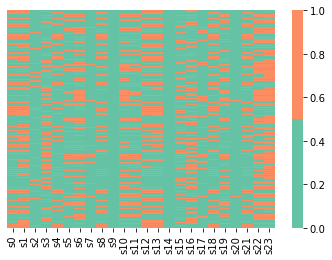

In [50]:
#Makes it into a binary classification. Greater than .5 probability indicates the species is likely present.
cmap = sns.color_palette("Set2", 2) 
ax = sns.heatmap(pred.drop(['recording_id'], axis = 1), cmap=cmap, yticklabels = False)

In [136]:
most_Predicted = pd.DataFrame(index = results['recording_id'], columns = ["Probability", "Species"])

In [137]:
for x in range(len(prob)):
    max1 = max(prob.iloc[x,range(1,len(prob.columns))])
    col1 = np.where(prob.iloc[x,range(1,len(prob.columns))] == max1)[0]
    col2=col1[0]+1
    colnam = prob.columns[col2]
    most_Predicted['Probability'][x] = max1
    most_Predicted['Species'][x] = colnam

In [185]:
most_Predicted.head()

,Probability,Species
recording_id,,
293791220,0.958516,s1
176321177,0.911367,s13
53db66bd9,0.99025,s16
0637cd357,0.82122,s10
8cc7be1ef,0.877794,s8


Text(0.5, 1.0, 'Predicted Occurnces')

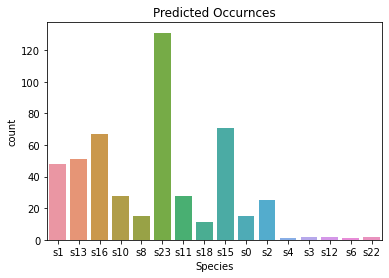

In [142]:
#Number of times a species' predicted probabilty is greater than 50%
ax = sns.countplot(x="Species", data=most_Predicted)
ax.set_title("Main Predicted Occurnces")

Text(0.5, 1.0, 'Predicted Species Counts')

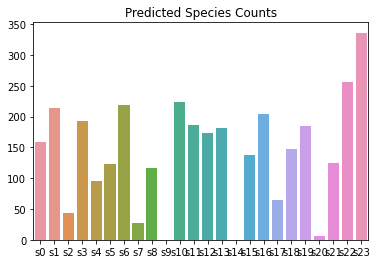

In [184]:
#Number of times a species' predicted probabilty is greater than 50%
import matplotlib as plt
df=pred.sum(axis=0)
df=df.drop(df.index[0])
ax=sns.barplot(x=df.index, y=df.values)
ax.set_title("Predicted Species Counts")